<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_5/5_1_Exploratory_Data_Analysis_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - Multivariate  


---

## Multivariate EDA 

Multivariate = multiple variables. Multivariate analysis involves the examination of multiple variables simultaneously in order to identify the relationships between them. It is used to identify patterns and relationships between variables, to explain the variability of a response variable. 


---


In this notebook we are going to dive into some basic multivariate analysis without digging too deep into statistics. 

1. Numieric to Numeric Analysis 
  - correlation
  - scatterplots
  - heatmaps
2. Categorical to Categorical Analysis
  - n-way frequency analysis 
3. Categorical to Numeric Analysis 
  - boxplot
  - barcharts
4. anomaly detection 
  - LOF with more than 1 variable 



In [1]:
# --------------------------------
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [10]:

# read the file using read_csv
opioid = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_4/data/NC_OPIOID_ANALYSIS.csv")

# eyeball the first several records
opioid.head()

,NPI,Credentials,Gender,Entity_Type,Street_Address_1,Street_Address_2,State_Code,Provider_Type,Num_of_Services,Num_of_Medicare_Beneficiaries,...,HYDROCODONE_script_count,tramadol_script_count,Percocet_script_count,oxycodone_script_count,fentanyl_script_count,levothyroxine_script_count,potassium_script_count,metformin_script_count,diltiazem_script_count,gabapentin_script_count
0,1003007964,PA-C,F,I,3101 LATROBE DR,NaN,NC,Physician Assistant,103.0,82,...,34,0,0,0,0,0,0,0,0,0
1,1003011578,M.D.,F,I,415 N CENTER ST,SUITE 300,NC,Gastroenterology,1281.0,530,...,0,0,0,0,0,0,0,0,0,0
2,1003013756,D.O.,M,I,2651 MORGANTON BLVD SW,NaN,NC,Family Practice,1476.0,474,...,40,32,15,0,0,81,0,173,0,60
3,1003026550,PA-C,M,I,301 YADKIN ST,NaN,NC,Physician Assistant,1176.0,256,...,123,11,309,633,33,0,0,0,0,23
4,1003031691,M.D.,M,I,2800 BLUE RIDGE RD STE 201,NaN,NC,Internal Medicine,1741.0,559,...,0,0,0,0,0,0,0,0,0,0


## About the Data 


---

This data comes from medicare opendata public use file(PUF). It contains a summary of perscriptions by medicare provider specifically we are interested in top opiate and non-opiate perscriptions by provider. 


|column |  description |
|--------------- |----------------------- | 
|NPI | national provider identifier|
|Credentials | physician credentials | 
|Gender||
|Entity_Type| Individual or Organization |
|Street_Address_1 | |
|Street_Address_2 ||
|State_Code | All in NC |
|Provider_Type | type of provider|
|Num_of_Services | number of services provided to medicare patients |
|Num_of_Medicare_Beneficiaries| number of medicare beneficiaries |
| Total_Medicare_Payment_Amt | amount paid by medicare to NPI|
|Average_Age_of_Beneficiaries||
|Medical_school_name| where the physician went to school |
|Graduation_year| year they graduated|
|Primary_specialty||
|Organization_legal_name||
|city_name||
|population_est | estimated population by zip code |
|people_sq_mile | population density |
|Years_in_Practice | |
|Full_Name ||

|numeric columns of interest | 
| -------   |
|HYDROCODONE_day_count|
|TRAMADOL_day_count|
|Percocet_day_count|
|oxycodone_day_count|
|fentanyl_day_count|
|levothyroxine_day_count|
|potassium_day_count|
|metformin_day_count|
|diltiazem_day_count|
|gabapentin_day_count|
|HYDROCODONE_script_count|
|tramadol_script_count|
|Percocet_script_count|
|oxycodone_script_count|
|fentanyl_script_count|
|levothyroxine_script_count|
|potassium_script_count|
|metformin_script_count|
|diltiazem_script_count|
|gabapentin_script_count|



## Numeric to Numeric : Correlation Analysis

---


Correlation analysis is a statistical technique that is used to measure the strength and direction of the relationship between two or more variables. The goal of correlation analysis is to determine if a relationship exists between the variables, and if so, the nature and strength of that relationship.

A correlation coefficient is calculated to represent the strength and direction of the relationship between the variables. A value of +1 indicates a perfect positive correlation (i.e. as one variable increases, so does the other), a value of -1 indicates a perfect negative correlation (i.e. as one variable increases, the other decreases), and a value of 0 indicates no correlation.

                         HYDROCODONE_day_count  TRAMADOL_day_count  \
HYDROCODONE_day_count                 1.000000            0.649216   
TRAMADOL_day_count                    0.649216            1.000000   
Percocet_day_count                    0.699245            0.385887   
oxycodone_day_count                   0.559566            0.276342   
fentanyl_day_count                    0.637264            0.357745   
levothyroxine_day_count               0.430430            0.648978   
potassium_day_count                   0.459323            0.596772   
metformin_day_count                   0.467561            0.657666   
diltiazem_day_count                   0.220262            0.257115   
gabapentin_day_count                  0.686396            0.740146   

                         Percocet_day_count  oxycodone_day_count  \
HYDROCODONE_day_count              0.699245             0.559566   
TRAMADOL_day_count                 0.385887             0.276342   
Percocet_day_count       

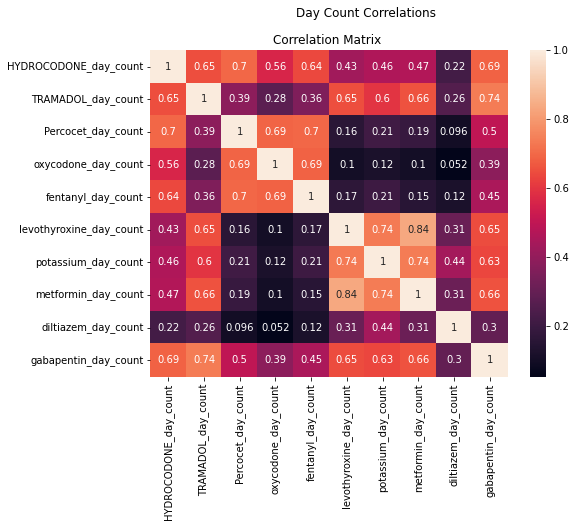

In [11]:
# Calculate the correlation matrix
corr = opioid[[
    "HYDROCODONE_day_count",
"TRAMADOL_day_count",
"Percocet_day_count",
"oxycodone_day_count",
"fentanyl_day_count",
"levothyroxine_day_count",
"potassium_day_count",
"metformin_day_count",
"diltiazem_day_count",
"gabapentin_day_count",
]].corr()

# print correlation matrix
print(corr)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix as a heatmap using seaborn
sns.heatmap(corr, annot=True)

# Add a title to the plot
plt.suptitle("Day Count Correlations")
plt.title("Correlation Matrix ")

# Show the plot
plt.show()

Generally, a correlation needs to be > 0.1 or < -0.1 to be considered to have a correlation. For example percocet vs diatiazem is low (0.096) that is not strong. 

- Percocet is a prescription pain reliever that contains a combination of acetaminophen and oxycodone. It is used to relieve moderate to severe pain.

- Diltiazem is a calcium channel blocker used to treat high blood pressure, angina (chest pain), and certain heart rhythm disorders. It works by relaxing the blood vessels, which allows the blood to flow more easily and the heart to pump more efficiently.

While gabapentin vs hydrocodone is strong (0.69) lets see what their scatterplots hold. 

- Gabapentin is a prescription anticonvulsant and analgesic drug. It is primarily used to treat seizures and neuropathic pain, such as that associated with shingles or peripheral neuropathy(nerve pain, numbness, tingling, and weakness). 

- Hydrocodone is a powerful opioid analgesic medication used to treat moderate to severe pain. It is often used in combination with acetaminophen in prescription pain medications. 

## Numeric to Numeric : Scatterplot 


---

Scatter plots are used to visualize the relationship between two numeric variables. Basically,  to identify any patterns or trends in the data, and to determine if there is any association between the variables. The shape, direction, and strength of the relationship between the variables can be inferred from the scatter plot. 




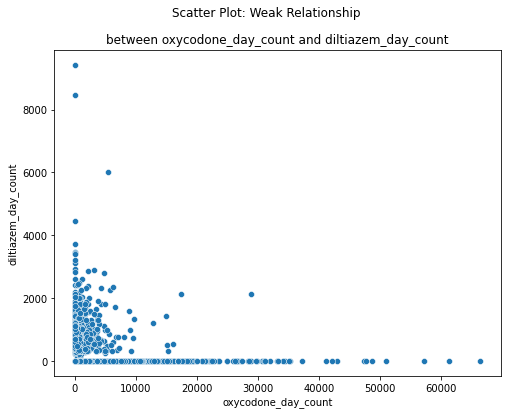

In [12]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix as a heatmap using seaborn
sns.scatterplot(data=opioid, x="oxycodone_day_count", y="diltiazem_day_count")

# Add a title to the plot
plt.suptitle("Scatter Plot: Weak Relationship  ")
plt.title("between oxycodone_day_count and diltiazem_day_count")

# Show the plot
plt.show()

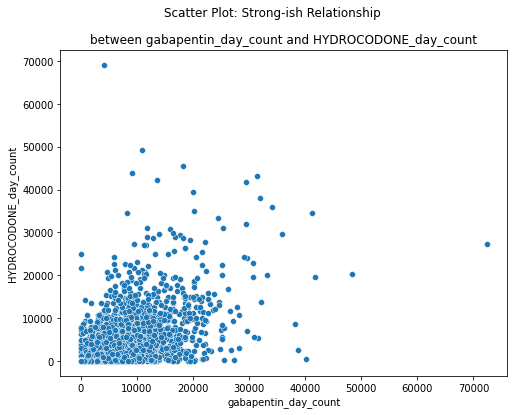

In [13]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the correlation matrix as a heatmap using seaborn
sns.scatterplot(data=opioid, x="gabapentin_day_count", y="HYDROCODONE_day_count")

# Add a title to the plot
plt.suptitle("Scatter Plot: Strong-ish Relationship  ")
plt.title("between gabapentin_day_count and HYDROCODONE_day_count")

# Show the plot
plt.show()

## Seaborn's Pairs Plot


---

The seaborn library provides a function called pairplot! This function allows you to visualize relationships between multiple variables in a dataset. The pairplot creates a matrix of plots showing scatterplots and histograms for each pair of variables, and optionally plots the distribution of each variable in the diagonal.

It's AWESOME but Slow

```python
# Load the sample dataset
diamonds = sns.load_dataset("diamonds")

# Plot the pairplot
sns.pairplot(diamonds, diag_kind='hist', kind='scatter')
```

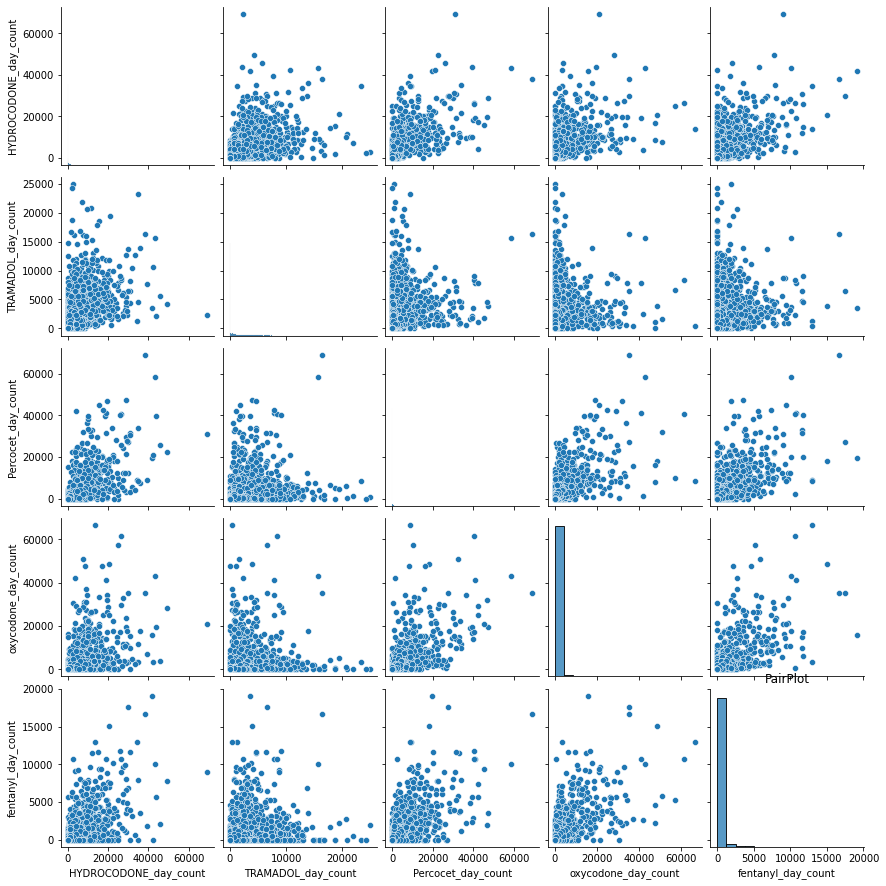

In [46]:


# Plot the pairplot
sns.pairplot(opioid[[
                     "HYDROCODONE_day_count",
"TRAMADOL_day_count",
"Percocet_day_count",
"oxycodone_day_count",
"fentanyl_day_count"]], diag_kind='hist', kind='scatter')
plt.title("PairPlot")
# Show the plot
plt.show()



## Category to Category: N-Way Frequency


You can perform n-way frequency analysis using the crosstab function in Pandas. It creates a cross-tabulation table, also known as a contingency table. The function takes two or more categorical variables as input and returns a frequency table showing the frequency of occurrences for each possible combination of categories.

To create a cross-tabulation table, you need to call the crosstab function and pass in the categorical variables that you want to analyze. The function takes two mandatory parameters: index and columns. The index parameter specifies the row variable, and the columns parameter specifies the column variable.

```python

# Create a sample dataframe
data = {'fruit': ['apple', 'banana', 'banana', 'apple', 'apple', 'banana'],
        'color': ['red', 'yellow', 'yellow', 'red', 'green', 'yellow']}
df = pd.DataFrame(data)

# Use crosstab to create a cross-tabulation table
nway_table = pd.crosstab(index=df['fruit'], columns=df['color'])

# Print the frequency table
print(nway_table)

```

Here's an example looking at Gender and Primary Specialty:

In [16]:
pd.crosstab(columns=opioid["Gender"],index=opioid["Primary_specialty"])

Gender,F,M
Primary_specialty,,
ADDICTION MEDICINE,1,1
ADVANCED HEART FAILURE AND TRANSPLANT CARDIOLO,0,9
ALLERGY/IMMUNOLOGY,29,51
ANESTHESIOLOGY,11,83
CARDIAC ELECTROPHYSIOLOGY,2,32
...,...,...
SPORTS MEDICINE,2,22
SURGICAL ONCOLOGY,3,5
THORACIC SURGERY,0,19


### Heatmaps & Crosstabs


---


Note you can pass the cmap parameter to the heatmap function. cmap stands for "color map", and you can use any colormap available in the matplotlib library by passing its name as a string to the cmap parameter.



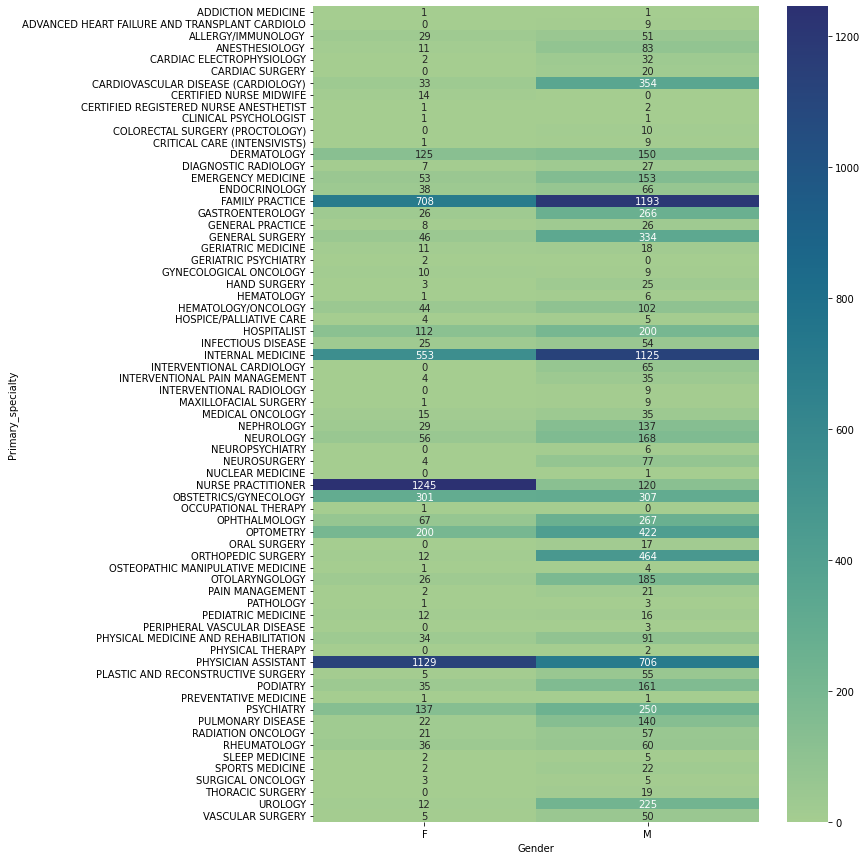

In [24]:
nway = pd.crosstab(columns=opioid["Gender"],index=opioid["Primary_specialty"])
# Set the figure size
plt.figure(figsize=(10, 15))

# Plot the frequency table with seaborn heatmap
sns.heatmap(nway, annot=True, fmt='d',cmap="crest")

# Show the plot
plt.show()

## Category to Numeric


---

Let's simply take a look at top 10 cities by average HYDROCODONE_day_count. Does it tell us anything? or would we need to factor in things like population etc? 


In [ ]:
# -- one big line of code 
city_hydro = opioid.groupby("city_name").mean()[["HYDROCODONE_day_count"]].sort_values("HYDROCODONE_day_count", ascending=False).head(10).reset_index()
city_hydro

In [31]:
# -- much more readable method chain
city_hydro2 = ( opioid
               .groupby("city_name")
               .mean()[["HYDROCODONE_day_count"]]
               .sort_values("HYDROCODONE_day_count", ascending=False)
               .head(10)
               .reset_index()
)

city_hydro2

,city_name,HYDROCODONE_day_count
0,Andrews,22955.500000
1,Lawndale,15821.000000
2,Banner Elk,14379.000000
3,Wade,14356.000000
4,Lansing,13528.000000
5,Parkton,12723.000000
6,Stoneville,12424.500000
7,Red Springs,10923.000000
8,Maxton,10250.666667
9,Hamlet,9558.636364


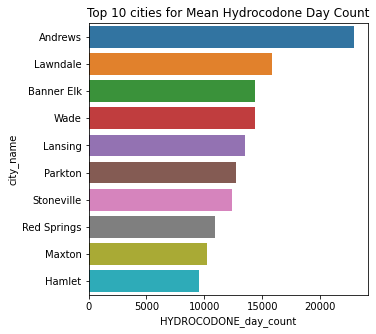

In [36]:

plt.figure(figsize=(5, 5))

# plot a barchart
sns.barplot(data=city_hydro2,
            x = "HYDROCODONE_day_count",
            y = "city_name"
            )

plt.title("Top 10 cities for Mean Hydrocodone Day Count")
# Show the plot
plt.show()


## Anomaly Detection using LOF 


---


Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. BLAH,BLAH,BLAH all we care about is that it finds novelty in the records. 

The number of neighbors and contamination are key parameters to consider when calculating the Local Outlier Factor (LOF) A higher number of neighbors will make the LOF calculation more sensitive to the local density of the data, while a lower number of neighbors will make it more sensitive to individual outliers.


- neighbors: how many similar records to calculate
- conamination: % of data likely to contain outliers 

Here we simply pass numeric variables (yes only works with numeric) to the LocalOutlierFactor function it will do the rest. 

In [37]:
# -- LOF -- 
from sklearn.neighbors import LocalOutlierFactor

# Create the LOF model
n_neighbors = 10
# Create a LocalOutlierFactor model
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.005 , novelty=True)

# extract the column into a Dataframe and take a sample. 
X = opioid[[ "HYDROCODONE_day_count",
"TRAMADOL_day_count",
"Percocet_day_count",
"oxycodone_day_count",
"fentanyl_day_count"]].sample(n=10000) # i like to sample! 

# Fit the model to the data - "this is called training"
is_outlier = lof.fit(X)

# Predict the outliers in the full dataset 
opioid['outlier'] = lof.predict(opioid[[ "HYDROCODONE_day_count",
"TRAMADOL_day_count",
"Percocet_day_count",
"oxycodone_day_count",
"fentanyl_day_count"]])

# Identify the outliers based on the threshold
outliers = opioid.query('outlier ==  -1 ')


# summarize the outliers
print("The LOF method we found: {} outliers or about {:.2f}% of dataset".format(
    outliers.shape[0],
    (outliers.shape[0]/opioid.shape[0])*100
))


The LOF method we found: 31 outliers or about 0.22% of dataset


In [43]:
# -- who are they? -- basically the providers that don't perscribe opioids -- but we'd need to dig further.
outliers[["NPI","Full_Name","Credentials",
          "Provider_Type",
          "HYDROCODONE_day_count",
"TRAMADOL_day_count",
"Percocet_day_count",
"oxycodone_day_count",
"fentanyl_day_count"]]

,NPI,Full_Name,Credentials,Provider_Type,HYDROCODONE_day_count,TRAMADOL_day_count,Percocet_day_count,oxycodone_day_count,fentanyl_day_count
249,1013979426,FRANK W MAULDIN,M.D.,Otolaryngology,77,0,0,0,0
1229,1083936710,TRACI J NIXON,FNP,Nurse Practitioner,0,365,0,0,0
1455,1104898717,SEAN J MURPHY,D.O.,Dermatology,91,0,0,0,0
1883,1144205493,EDISON K PICKLESIMER,DPM,Podiatry,195,0,0,0,0
2042,1154332815,ERIC V WARD,D.P.M.,Podiatry,89,0,0,0,0
2789,1205825601,JEFFREY G HARRISON,PA-C,Physician Assistant,191,0,0,0,0
3130,1225266158,MICHAEL BRASHEAR,P.A,Physician Assistant,91,0,0,0,0
3364,1245275072,TIMOTHY R HEIDER,MD,General Surgery,0,0,115,0,0
5015,1366501454,TRACY L RENTNER,R.N.C-F.N.P,Nurse Practitioner,0,0,115,0,0
5100,1376526624,JAMES E FLEISCHLI,MD,Orthopedic Surgery,158,0,0,0,0
